In [3]:
import pandas as pd
import numpy as np

In [4]:
global_temp = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
ghg_emissions = pd.read_csv("CAIT Country GHG Emissions.csv", skiprows=2)

In [5]:
#help(pd.read_csv)

In [6]:
print global_temp.info()
print ghg_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577462 entries, 0 to 577461
Data columns (total 4 columns):
dt                               577462 non-null object
AverageTemperature               544811 non-null float64
AverageTemperatureUncertainty    545550 non-null float64
Country                          577462 non-null object
dtypes: float64(2), object(2)
memory usage: 22.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 22 columns):
Country                                                                 4324 non-null object
Year                                                                    4324 non-null int64
Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e)     4304 non-null float64
Total GHG Emissions Including Land-Use Change and Forestry (MtCO?e?)    4304 non-null float64
Total CO2 (excluding Land-Use Change and Forestry) (MtCO2)              4304 non-null float64
Total CH4 (MtCO2e)              

In [7]:
ghg_emissions.head()

,Country,Year,Total GHG Emissions Excluding Land-Use Change and Forestry (MtCO2e),Total GHG Emissions Including Land-Use Change and Forestry (MtCO?e?),Total CO2 (excluding Land-Use Change and Forestry) (MtCO2),Total CH4 (MtCO2e),Total N2O (MtCO2e),Total F-Gas (MtCO2e),Total CO2 (including Land-Use Change and Forestry) (MtCO2),Total CH4 (including Land-Use Change and Forestry) (MtCO2e),...,Industrial Processes (MtCO2e),Agriculture (MtCO2e),Waste (MtCO2e),Land-Use Change and Forestry (MtCO2),Bunker Fuels (MtCO2),Electricity/Heat (MtCO2),Manufacturing/Construction (MtCO2),Transportation (MtCO2),Other Fuel Combustion (MtCO2e),Fugitive Emissions (MtCO2e)
0,Afghanistan,1990,15.296936,15.961186,2.9907,9.3098,2.9943,0.0022,3.654722,9.309911,...,0.0571,7.3512,4.0390,0.6643,NaN,NaN,NaN,NaN,NaN,1.2556
1,Afghanistan,1991,15.351448,15.351628,2.7412,9.5144,3.0922,0.0036,2.741202,9.514511,...,0.0586,7.6393,4.2200,0.0002,NaN,NaN,NaN,NaN,NaN,1.0226
2,Afghanistan,1992,14.051281,14.051461,1.4252,9.5697,3.0513,0.0050,1.425242,9.569811,...,0.0637,7.6392,4.4011,0.0002,NaN,NaN,NaN,NaN,NaN,0.6026
3,Afghanistan,1993,14.064868,14.065048,1.3520,9.6081,3.0983,0.0065,1.352016,9.608191,...,0.0651,7.7102,4.5822,0.0002,NaN,NaN,NaN,NaN,NaN,0.4140
4,Afghanistan,1994,14.022181,14.022361,1.2971,9.7873,2.9300,0.0079,1.297056,9.787361,...,0.0665,7.7066,4.7633,0.0002,NaN,NaN,NaN,NaN,NaN,0.2473


In [8]:
#reading global surface land temperature
global_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [9]:
# dropping NaN values
global_monthly_temp = global_temp.dropna()
global_monthly_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland


In [10]:
#converting string date to date format
global_monthly_temp['dt'] = pd.to_datetime(global_monthly_temp['dt'], format="%Y-%m-%d")



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
#[x.date() for x in global_monthly_temp['dt']]
global_monthly_temp.loc[:, 'Year'] = [x.year for x in global_monthly_temp['dt']]

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
global_monthly_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01 00:00:00,4.384,2.294,Åland,1743
5,1744-04-01 00:00:00,1.530,4.680,Åland,1744
6,1744-05-01 00:00:00,6.702,1.789,Åland,1744
7,1744-06-01 00:00:00,11.609,1.577,Åland,1744
8,1744-07-01 00:00:00,15.342,1.410,Åland,1744


In [13]:
# Extracting bhutan's historical temperature change data
bhutan_temp = global_monthly_temp[global_monthly_temp['Country' ] == 'Bhutan']
bhutan_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
65441,1816-03-01 00:00:00,8.826,2.254,Bhutan,1816
65442,1816-04-01 00:00:00,11.436,3.293,Bhutan,1816
65443,1816-05-01 00:00:00,15.063,2.123,Bhutan,1816
65444,1816-06-01 00:00:00,16.612,2.653,Bhutan,1816
65445,1816-07-01 00:00:00,16.283,1.296,Bhutan,1816


In [15]:
#importing visualization tool matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

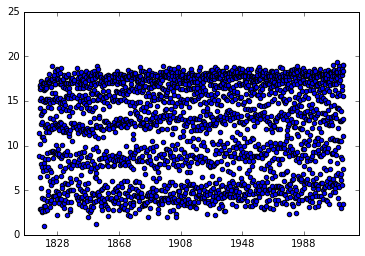

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(bhutan_temp['dt'], bhutan_temp['AverageTemperature'])
#ax.scatter(list(bhutan_temp['dt']), list(bhutan_temp['AverageTemperature']))
#ax.hist(bhutan_temp['dt'], bhutan_temp['AverageTemperature'])
plt.scatter(list(bhutan_temp['dt']), list(bhutan_temp['AverageTemperature']))

In [23]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.tseries.tools:

to_datetime(*args, **kwargs)
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : string, datetime, array of strings (with possible NAs)
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception
        - If 'coerce', then invalid parsing will be set as NaT
        - If 'ignore', then invalid parsing will return the input
    dayfirst : boolean, default False
        Specify a date parse order if `arg` is str or its list-likes.
        If True, parses dates with the day first, eg 10/11/12 is parsed as 2012-11-10.
        with day first (this is a known bug, based on dateutil behavior).
    yearfirst : boolean, default False
        Specify a date parse order if `arg` is str or its list-likes.
        - If True parses dates with the year first, eg 10/11/12 is parsed as 2010-11-12.
        - If both dayfirst and yearfirst are True, y

In [24]:
#World Bank GHG emissions Data

ghg_emissions_wb = pd.read_csv("GHGEmissions_country.csv", skiprows=4)

In [25]:
ghg_emissions_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 61 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              229 non-null float64
1971              229 non-null float64
1972              229 non-null float64
1973              229 non-null float64
1974              229 non-null float64
1975              229 non-null float64
1976              229 non-null float64
1977              229 non-null float64
1978              229 non-null float64
1979              229 

In [26]:
#World bank c02 emissions
co2_emissions_wb = pd.read_csv("Co2Emissions_country.csv", skiprows=4)

In [27]:
co2_emissions_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 61 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              178 non-null float64
1961              179 non-null float64
1962              180 non-null float64
1963              181 non-null float64
1964              186 non-null float64
1965              186 non-null float64
1966              186 non-null float64
1967              186 non-null float64
1968              185 non-null float64
1969              186 non-null float64
1970              188 non-null float64
1971              189 non-null float64
1972              192 non-null float64
1973              192 non-null float64
1974              192 non-null float64
1975              192 non-null float64
1976              192 non-null float64
1977              192 non-null float64
1978              192 non-null float64
19

In [28]:
#removing null columns
co2_emissions_wb.drop('Unnamed: 60', 1, inplace=True)
co2_emissions_wb.drop('2012', 1, inplace=True)
co2_emissions_wb.drop('2013', 1, inplace=True)
co2_emissions_wb.drop('2014', 1, inplace=True)
co2_emissions_wb.drop('2015', 1, inplace=True)

In [29]:
co2_emissions_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 56 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              178 non-null float64
1961              179 non-null float64
1962              180 non-null float64
1963              181 non-null float64
1964              186 non-null float64
1965              186 non-null float64
1966              186 non-null float64
1967              186 non-null float64
1968              185 non-null float64
1969              186 non-null float64
1970              188 non-null float64
1971              189 non-null float64
1972              192 non-null float64
1973              192 non-null float64
1974              192 non-null float64
1975              192 non-null float64
1976              192 non-null float64
1977              192 non-null float64
1978              192 non-null float64
19

In [30]:
#togo_co2 = co2_emissions_wb[co2_emissions_wb['Country Name'] == 'Togo']
#print togo_co2
#type(togo_co2)
country_wise_co2 = pd.melt(co2_emissions_wb,id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Co2_emissions')
country_wise_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
1,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046068
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.104357
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.258195


In [32]:
#dropping null values
country_wise_co2.dropna(inplace=True)
country_wise_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.046068
3,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.104357
4,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.258195
5,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
6,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.118786


In [35]:
# Extracting Bhutan's co2 emissions history

bhutan_co2 = country_wise_co2[country_wise_co2['Country Name'] == 'Bhutan']
bhutan_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
2510,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1970,0.012582
2758,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1971,0.012156
3006,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1972,0.011726
3254,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1973,0.011302
3502,Bhutan,BTN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1974,0.010892


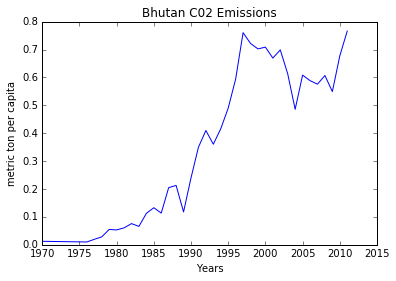

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bhutan_co2['Year'], bhutan_co2['Co2_emissions'])
ax.set_title("Bhutan C02 Emissions")
ax.set_xlabel("Years")
ax.set_ylabel("metric ton per capita")

In [76]:
# Extracting USA's Co2 emissions

usa_co2 = country_wise_co2[country_wise_co2['Country Name'] == 'United States']
usa_co2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Co2_emissions
233,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
481,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
729,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
977,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
1225,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


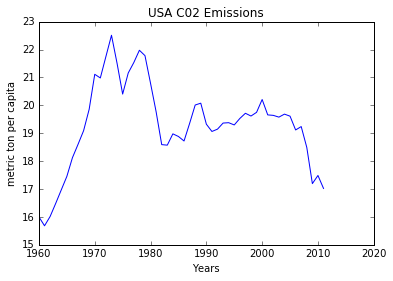

In [78]:
# Plotting USA's co2 emissions over time
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(usa_co2['Year'], usa_co2['Co2_emissions'])
ax.set_title("USA C02 Emissions")
ax.set_xlabel("Years")
ax.set_ylabel("metric ton per capita")

# Forest area by Percentage data from World Bank 

In [69]:
forest_cover = pd.read_csv("Country_wise_forest_area_percentage.csv", skiprows=4)
forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 61 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

In [70]:
# Dropping null columns

forest_cover.drop(forest_cover.columns[range(4,34)], 1, inplace=True)
forest_cover.drop(['2014', 'Unnamed: 60'], 1, inplace=True)
forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 29 columns):
Country Name      248 non-null object
Country Code      248 non-null object
Indicator Name    248 non-null object
Indicator Code    248 non-null object
1990              235 non-null float64
1991              209 non-null float64
1992              232 non-null float64
1993              235 non-null float64
1994              235 non-null float64
1995              235 non-null float64
1996              235 non-null float64
1997              235 non-null float64
1998              235 non-null float64
1999              235 non-null float64
2000              241 non-null float64
2001              237 non-null float64
2002              237 non-null float64
2003              237 non-null float64
2004              237 non-null float64
2005              241 non-null float64
2006              239 non-null float64
2007              239 non-null float64
2008              239 non-null float64
20

In [71]:
# modifying the frame: folding year value into a column 

forest_cover = pd.melt(forest_cover, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='ForestCoverPercent')
forest_cover.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,ForestCoverPercent
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,1990,0.000000
1,Andorra,AND,Forest area (% of land area),AG.LND.FRST.ZS,1990,34.042553
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,1990,2.067825
3,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,1990,48.909922
4,Albania,ALB,Forest area (% of land area),AG.LND.FRST.ZS,1990,28.795620


In [72]:
#drop na values

forest_cover.dropna(inplace = True)
forest_cover.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 6199
Data columns (total 6 columns):
Country Name          5901 non-null object
Country Code          5901 non-null object
Indicator Name        5901 non-null object
Indicator Code        5901 non-null object
Year                  5901 non-null object
ForestCoverPercent    5901 non-null float64
dtypes: float64(1), object(5)
memory usage: 322.7+ KB


In [73]:
# Extracting Bhutan's forest % distribution

bhutan_forest_cover = forest_cover[forest_cover['Country Name'] == 'Bhutan']
bhutan_forest_cover.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,ForestCoverPercent
30,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1990,53.656657
278,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1991,53.862980
526,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1992,54.075509
774,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1993,54.288038
1022,Bhutan,BTN,Forest area (% of land area),AG.LND.FRST.ZS,1994,63.980653


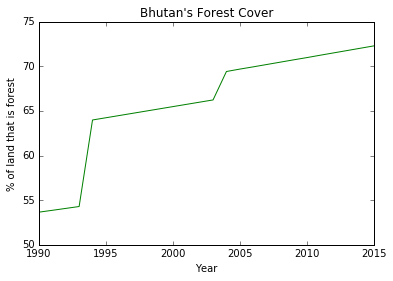

In [75]:
# Plotting distribution of Bhutan's forest cover

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(bhutan_forest_cover['Year'], bhutan_forest_cover['ForestCoverPercent'], color = "Green")
ax.set_title("Bhutan's Forest Cover")
ax.set_xlabel("Year")
ax.set_ylabel("% of land that is forest")

In [79]:
# Extracting USA's forest cover percentage

usa_forest_cover = forest_cover[forest_cover['Country Name'] == 'United States']
usa_forest_cover.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,ForestCoverPercent
233,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1990,33.022308
481,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1991,33.034165
729,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1992,33.046023
977,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1993,33.057880
1225,United States,USA,Forest area (% of land area),AG.LND.FRST.ZS,1994,33.069737


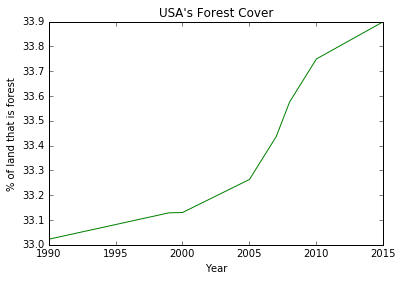

In [80]:
# Plotting distribution of USA's forest cover

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(usa_forest_cover['Year'], usa_forest_cover['ForestCoverPercent'], color = "Green")
ax.set_title("USA's Forest Cover")
ax.set_xlabel("Year")
ax.set_ylabel("% of land that is forest")